# UBS Challenge Introduction

------

### 题目2 (Question 2)：风险预警师 (Risk Alert Specialist)

区间累计计息的结构化票据 (Range Accrual Note) 是一种挂钩利率的衍生金融产品，兼具传统的固定收益产品和金融衍生工具的特点。投资者在投资此类产品时，往往对互换利率 (例如5年期互换利率) 的走势有所预期，并将票息收益与此挂钩。而此类产品的结构往往被设计成具有上、下限的特征，从而为投资者的收益提供一定程度上的保护。

Range Accrual Note is an interest rate-linked derivative financial product that combines the characteristics of traditional fixed income products and financial derivatives. When investors invest in such products, they often have expectations for the trend of the swap rate (such as the 5-year swap rate) and link the coupon income to this. The structure of such products is often designed to have upper and lower limits, thereby providing a certain degree of protection for investors' returns.

## Fundamental Knowledge

### Range Accrual

Source: https://www.investopedia.com/terms/r/rangeaccrual.asp

- A ```Range Accrual``` is a structured product based on an underlying index whose ```returns are maximized if the reference index stays within the investor's defined range```. Variations on range accrual notes include accretion bonds, index range notes, corridor bonds, corridor notes, range floaters, and fairway bonds. 

- The investor holding the range accrual security desires the reference index to stay within a specified range from the range accrual's issuance to its maturity. ```The reference index could be an interest rate```, such as LIBOR. It might also be a ```currency exchange rate, commodity, or stock index```. 

### Implied Volatility (IV) and IV Percentile

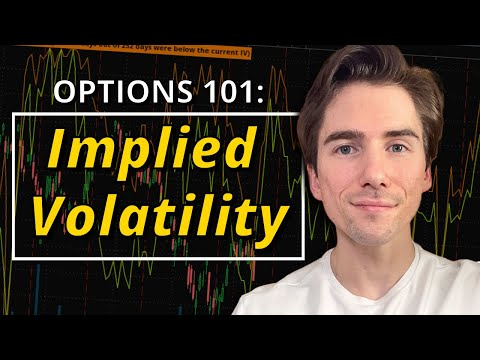

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('reU9vOeDIl8')

- If there are more short sellers, then the ```supply increases, and the option price will drop```. 

- If there are ```more buyers, the option prices will increase```, and the ```Implied Volatility (IV) will increase```. 

- As the ```IV increases, you may make more money from the option``` as people are more willing to buy it with a higher price. When everybody is buying, you should sell. The ```IV Crush``` is the action of selling options once the holder perceived an enough gain. 

- If the option is ```deep in money```, or ```far out of money``` (close to 0), then the ```IV may be very high```. 

- Therefore, when ```IV is low```, people are tend to ```buy options```. When ```IV is high```, people are tend to ```sell options```. 

- The ```Inplied Volatility Percentile``` can tell us what the current IV is, compared the past IV within a certain range. 

- When ```IVP is too high```, we should sell options. When ```IVP is not too high```, consider how the option is going to move, versus what the markets are expecting that option to move. 

- If the ```expected move is higher``` than your prediction, ```sell the option```. Otherwise, buy the option. 

### Vega

Source: https://www.investopedia.com/terms/v/vega.asp

Vega is the measurement of ```an option's price sensitivity to changes in the volatility``` of the underlying asset. 

It  represents ```the amount that an option contract's price changes in reaction``` to a ```1% change in the Implied Volatility (IV)``` of the underlying asset. 

### Monte Carlo Model

## Challenge Overview

### Setup Python

According to the challenge, Python 3.8 should be used. 

- On Mac: ```pyenv install 3.8.10```. Upon installation, enter ```pyenv global 3.8.10``` in vscode cell. Select the installed Python Kernel starting with ```/usr/local/bin``` or ```/.pyenv/versions/3.8``` in VSCode. Note that earlier versions are not supported by M1/M2 chips. 

- On Windows: Install from <a href="https://www.python.org/downloads/windows/">Python Releases for Windows</a>

Check the Python version, should return 3.8.x: 

In [4]:
import os, sys, subprocess
if (sys.platform.startswith("darwin")): 
    try:
        output = subprocess.check_output(['pyenv', 'versions'], universal_newlines=True)
        versions = ''.join((output.strip().split('\n')))
        if '3.8.10' not in versions: 
            os.system("pyenv install 3s.8.10")
        print ("Python 3.8.10 is available. ")
    except Exception as e: 
        print("Error: pyenv is not installed or not available in the system PATH.")
        print (e)
    os.system("pyenv global 3.8.10")
else: print ("visit {https://www.python.org/downloads/windows/} and change python kernel")
!python --version

Python 3.8.10 is available. 
Python 3.8.10


### Create virtual environment

When changing the kernel in VSCode, click ```Select Another Kernel```, followed by ```Python Environments```, and ```Create Python Environment```. You may select ```Conda``` as environment type and Python 3.8 as the interpreter in as the virtual environment. Name the virtual environment, e.g., ```UBS```

You may also execute ```conda create --name UBS``` prior to selecting the virtual environment. 

### Download necessary packages

In [16]:
!pip install numpy --quiet
import numpy as np

2540.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [7]:
!pip install pandas --quiet
import pandas as pd

### Given .csv files

#### trade-price-ir-vegas.csv

This file contains timeseries of TV (Total Value) and IR Vega of each trade. 

- ```Value Date```: The date on which we compute the TV and Vega risks

- ```Trade Name```: Trade identity

- ```Trade Currency```: Currency of the trade

- ```Zero Rate Shock```: Shock value in bps (basis points) of the parallel yield curve zero rate shock

- ```TV (Total Value)```: Total value of the trade in its trade currency

- ```Expiry Bucket```: Expiry of the swaption

- ```Expiry Date```: Expiry date of the swaption

- ```Tenor Bucket```: Tenor of the swap to be entered by the swaption

- ```Vega```: Trade's sensitivity in cash towards market swaption implied Normal volatility

In [32]:
import numpy as np, pandas as pd
trade_price_ir_vegas_df = pd.read_csv("../assets/trade-price-ir-vegas.csv"); 
trade_price_ir_vegas_df_total_rows = trade_price_ir_vegas_df.shape[0]
print (f"Total: {trade_price_ir_vegas_df_total_rows} rows. Sampled rows: ")
sample_difference = 0.1
sample_points = np.arange(0, 1 + sample_difference, sample_difference)
print (sample_points)
sample_rows = [trade_price_ir_vegas_df.iloc[min(trade_price_ir_vegas_df_total_rows - 1, int(trade_price_ir_vegas_df_total_rows * sample))] for sample in sample_points]
sampled_df = pd.DataFrame(sample_rows)
sampled_df.drop_duplicates()

Total: 3919104 rows. Sampled rows: 
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


,Value Date,Trade Name,Trade Currency,Zero Rate Shock,TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega
0,2022-09-02,dummyTrade1,USD,-100,-227907.098775,1y,2023-09-04,10y,1.962246
391910,2022-10-25,dummyTrade5,USD,-25,-205659.046350,5y,2027-10-25,1y,3.337668
783820,2022-12-14,dummyTrade11,USD,-5,-615690.682885,18M,2024-06-14,5y,-4.165384
1175731,2023-02-17,dummyTrade7,USD,10,-590694.072735,10y,2033-02-17,15y,-0.633265
1567641,2023-04-06,dummyTrade2,USD,50,-215976.848584,3y,2026-04-07,3y,0.777678
1959552,2023-05-24,dummyTrade1,USD,-100,-187668.534269,1y,2024-05-24,10y,12.969633
2351462,2023-07-10,dummyTrade5,USD,-25,-182956.623465,5y,2028-07-10,1y,-0.648126
2743372,2023-08-25,dummyTrade11,USD,-5,-429947.951269,18M,2025-02-25,5y,-10.242808
3135283,2023-10-11,dummyTrade7,USD,10,-374690.122687,10y,2033-10-11,15y,0.546255
3527193,2023-11-28,dummyTrade2,USD,50,-118538.966892,3y,2026-11-30,3y,-7.720153


Consider the example row ```(2023-05-23, dummyTrade1, USD, -50, -158091.52, 5y, 2028-05-23, 4y, -32.53)```: 

- ```USD zero rates moves in parallel by -50 basis points``` on 2023-05-23, indicating the Market Condition. 

- dummyTrade1’s ```Total Value under the Market Condition``` is -158,091.52 in USD

- dummyTrade1’s sensitivity towards USD 5y swaption (underlying 4y IRS) market implied ```Normal volatility is -32.53``` in USD

#### market-data-swap-rates.csv

This file contains timeseries of swap rates: 

- ```Date```: Quote date

- ```Start Date```: start date of swap

- ```Tenor```: Swap tenor

- ```Swap Rate```: market swap rate value (in percentage)

Consider the example row ```(1/13/2021, 1/13/2022, 10y, 1.0813328677467247)```: 

- The ```swap rate for a 10y swap``` starting ```from 1/13/2022 quoted on 1/13/2021``` is ```1.0813328677467247%```. 

#### rates_vols.csv

This file contains time series of swap implied normal vols: 

- ```Date```: Quote date
  
- ```Expiry```: Expiry of the swaption
  
- ```Tenor```: Tenor of the swap to be entered by the swaption
  
- ```Strike```: Rate spread to ATM (At The Money) value
  
- ```Vols```: Market implied normal volatility (in percentage)


Consider the example row ```(1/13/2021, 10y, 10y, atm-1.0%, 0.17055186526449959)```: 

- On 1/13/2021, the ```implied normal volatility for a 10y swap starting in 10 years``` with ```strike being 0.99 * swap rate``` is 0.17055186526449959%. 

#### portfolio_information.csv

This file contains information of the portfolio used in IR Vega calculation: 

- ```Trade Name```: Trade identity
  
- ```Underlying```: Trade underlying
  
- ```Pay Frequency```: The time periof for each coupon payment
  
- ```Lower Bound```: Coupon payment lower bound
  
- ```Upper Bound```: Coupon payment upper bound


Consider the example row ```(dummyTrade1, USD:CMS:2Y, 6M, 5Y, 0.0042, 0.0379)```: 

- The dummyTrade1 is a ```5Y range accrual with 2y CMS rate as the underlying```, coupon is ```paid every 6M``` with ```lower bound = 0.0042 and upper bound = 0.0379```.

## Project Motivation

### The Challenge

- The ```structure of the product is relatively complex```, and its ```interval accumulation characteristics are relatively idiosyncratic``` and there is ```no simple numerical analytical solution```. Such products often use numerical simulation (Monte Carlo, etc.) methods to price and calculate related risk exposures.

- The calculation results of the Monte Carlo model are ```more accurate```, but there are problems such as ```slow calculation speed and low sensitivity to changes in the external environment```. 

### The Task

基于所提供的 ```模拟产品特征、历史风险因子的数据``` 以及 ```市场环境```，建立能 ```准确、高效预测该类产品风险敞口``` 的模型 （例如AI），检验 ```模型的效率和准确度```。

Based on the provided ```simulated product characteristics, historical risk factor data and market environment```, establish a model (such as AI) that can ```accurately and efficiently predict the risk exposure``` of this type of product, and test ```the efficiency and accuracy``` of the model.